In [ ]:
from google.colab import drive
drive.mount('/content/drive')

100%|██████████| 4000/4000 [00:22<00:00, 179.15it/s]


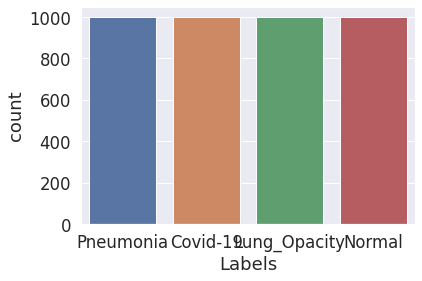

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


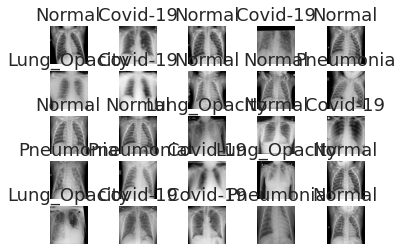

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
The following Variables were used a Lambda layer's call (tf.nn.convolution_212), but
are not present in its tracked objects:
  <tf.Variable 'conv1_conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.bias_add_212), but
are not present in its tracked objects:
  <tf.Variable 'conv1_conv/bias:0' shape=(64,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_212), but
are 

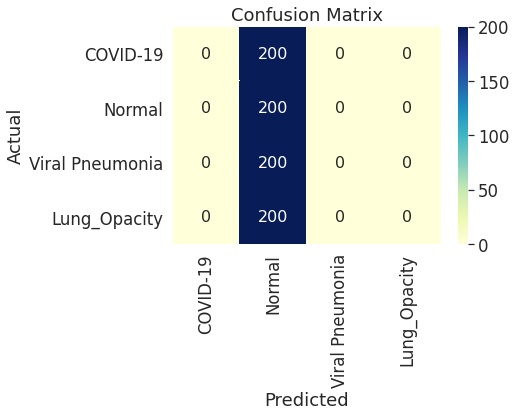

##### Plot the training loss and accuracy #####
Epoch 1/10
80/80 [==============================] - 878s 11s/step - loss: 0.5410 - accuracy: 0.4150 - val_loss: 0.6225 - val_accuracy: 0.2512
Epoch 2/10
80/80 [==============================] - 870s 11s/step - loss: 0.4403 - accuracy: 0.5928 - val_loss: 0.6274 - val_accuracy: 0.2763
Epoch 3/10
80/80 [==============================] - 865s 11s/step - loss: 0.4075 - accuracy: 0.6400 - val_loss: 0.5280 - val_accuracy: 0.3950
Epoch 4/10
80/80 [==============================] - 866s 11s/step - loss: 0.3770 - accuracy: 0.6853 - val_loss: 0.4110 - val_accuracy: 0.6037
Epoch 5/10
80/80 [==============================] - 870s 11s/step - loss: 0.3602 - accuracy: 0.7028 - val_loss: 0.3472 - val_accuracy: 0.7212
Epoch 6/10
80/80 [==============================] - 859s 11s/step - loss: 0.3454 - accuracy: 0.7175 - val_loss: 0.3162 - val_accuracy: 0.7563
Epoch 7/10
80/80 [==============================] - 854s 11s/step - loss: 0.3325 - accuracy: 0.7303 

KeyError: ignored

<Figure size 432x288 with 0 Axes>

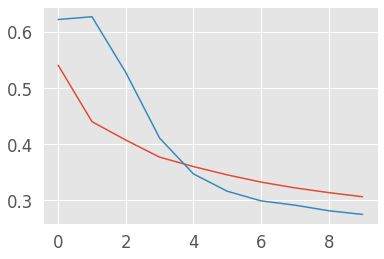

In [27]:
# -*- coding: utf-8 -*-

#Code : help:https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb#scrollTo=Cj4rXshqbQlS
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, 
# but they won't be saved outside of the current session

"""# import Libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#      DATA PREPARATION   ######
"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'):    
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
#plt.figure(figsize=(20,20))
plt.show()
plt.savefig("ClassLevelplot.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

#plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()
plt.savefig("ImageCategoryplot.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]
######## End of data preparation #############



# RESNET MODEL

from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model 
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, GlobalAveragePooling2D,BatchNormalization, Input, Conv2D

WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
SIZE = 150
#NUM_CLASSES = 4
beta_f2=2


def create_model(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=input_shape) 
    bn = BatchNormalization()(input_tensor)
    x = base_model(bn)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1056, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(4, activation='sigmoid')(x)
    model = Model(input_tensor, output)
    
    return model
model = create_model(input_shape=(SIZE,SIZE,3))
#model = create_model(input_shape=(SIZE,SIZE,3), n_out=28)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])
'''
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-3))


model = Model((base_model.input, conv1)
        loss = 'binary_crossentropy',
        optimizer = Adam(lr=0.00005),
        metrics = ['accuracy'])
'''

"""
#model = Model(base_model.input, conv1)
#model.compile(loss=bce_dice_loss, optimizer='adam', metrics=[iou_metric])
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 10
BATCH_SIZE = 8

model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam(lr = 0.00001)
model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])
'''
filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]

print(train_generator.class_indices)
'''
model.summary()

'''
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer = keras.optimizers.Adam(),
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])
'''
"""

#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")



